# PHAS0029 C9: Fourier Transform - assignment

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Part 1: Transforms of basic functions

### Task 1: A step function
<div class="alert alert-success">
Generate and plot a square-wave with $f(x) = +1$ for $0 \leq x < 0.5$ and $-1$ for $0.5 \leq x < 1$, over a single period.  (n.b. you <b> don't</b> need to write this as a Python function), sampled at $N = 1000$ evenly spaced points, and calculate and plot its Fourier coefficients. Use either FFT or the DFT function we created.<br>
Comment briefly on the results - are they what you expected? Refer to the standard results you know from PHAS0025 (MMIII).
<br>
<i>Hint: Note that, unlike in session 7 where we needed the wave in the form of a function, this can be done simply in a line or two of code. You just need a 1000-element array with every element = +1 for the first half and -1 for the second half.</i>    
</div>

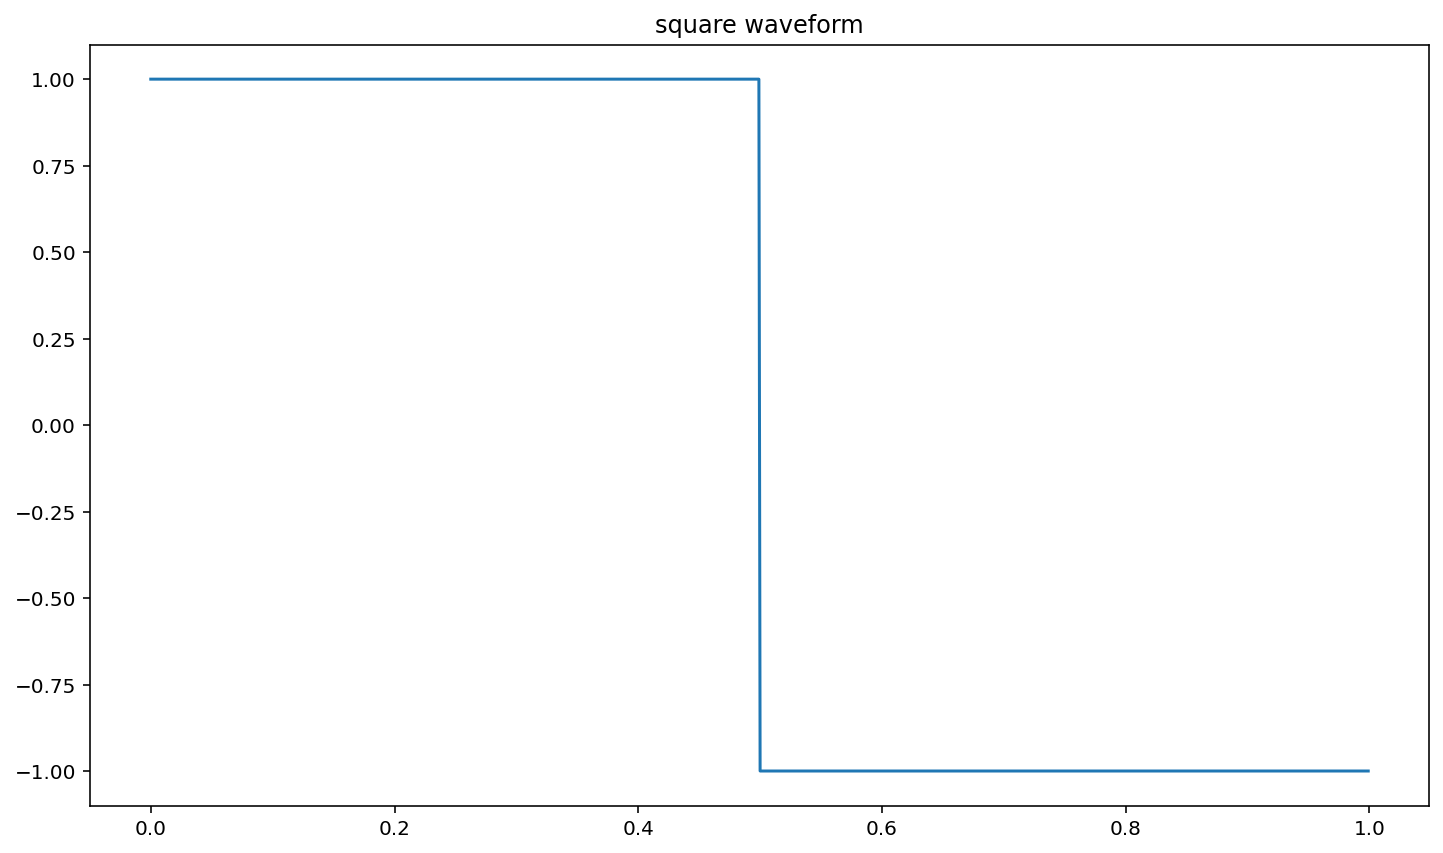

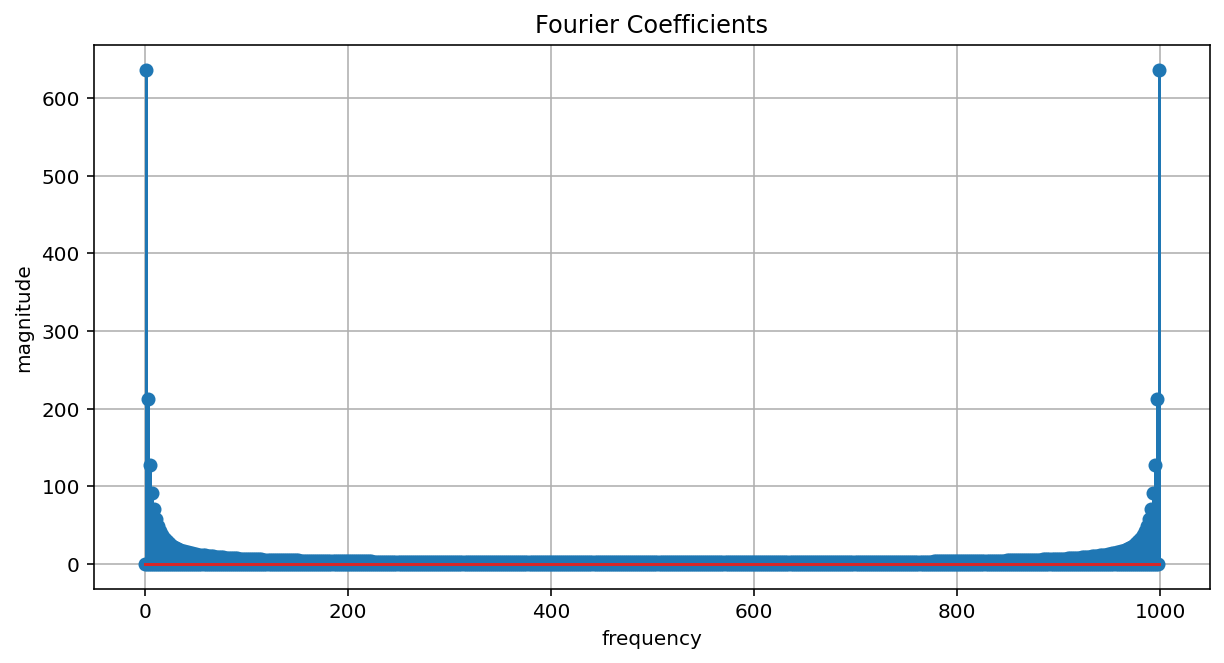

In [2]:
# YOUR CODE HERE

#creating the square wave
N=1000
t=1
t = np.linspace(0,1,N, endpoint=False)
f = np.zeros(N)
f[t < 0.5] = 1
f[t >= 0.5] = -1


plt.plot(t,f)
plt.title("square waveform")

def dft_1d(y):
    '''Simple implementation of the discrete Fourier transform in 1D
    Input: array of N sample values y
    Output: array of N-1 Fourier coefficients'''
    N = len(y)
    c = np.zeros(N, complex)   # set up an array of complex numbers, filled with 0s
    for k in range(N):         # loop over all N coefficients (runs from 0 to N-1)
        for n in range(N):     # calculate this coefficient.
            c[k] = c[k] + y[n]*np.exp(-2j*np.pi*k*n/N) # 2j: imaginary 2
    return c                   # return an array of coefficients



F = dft_1d(f)
# Plot Fourier coefficients
plt.figure(figsize=(10, 5))
plt.stem(np.abs(F))
plt.xlabel('frequency')
plt.ylabel('magnitude')
plt.title('Fourier Coefficients')
plt.grid()
plt.show()


No matter how many iterations are made when applying Fourier expansion, there will always be a curved region in the plot. This is so that the function does not abruptly jump, as it would in a real square wave. Odd integer harmonics make up the Fourier series of a square wave, and as frequency rises, the amplitude of each harmonic decreases. A succession of spikes at odd integer multiples of the fundamental frequency should therefore be seen as the magnitude of the Fourier coefficients, and this is exactly what is seen in the plot.


### Task 2: A single pulse
<div class="alert alert-success">
    Repeat the task above for a single square pulse defined over the region $0\leq x \leq 1000$, with $f(x) = +1$ for $0 \leq x \leq 10$ and zero elsewhere. In this case you should plot the real part of the coefficients rather than their absolute value. The real part of a complex number c are given by <code> c.real</code> (correspondingly, the imaginary parts are <code>c.imag</code>)


</div>


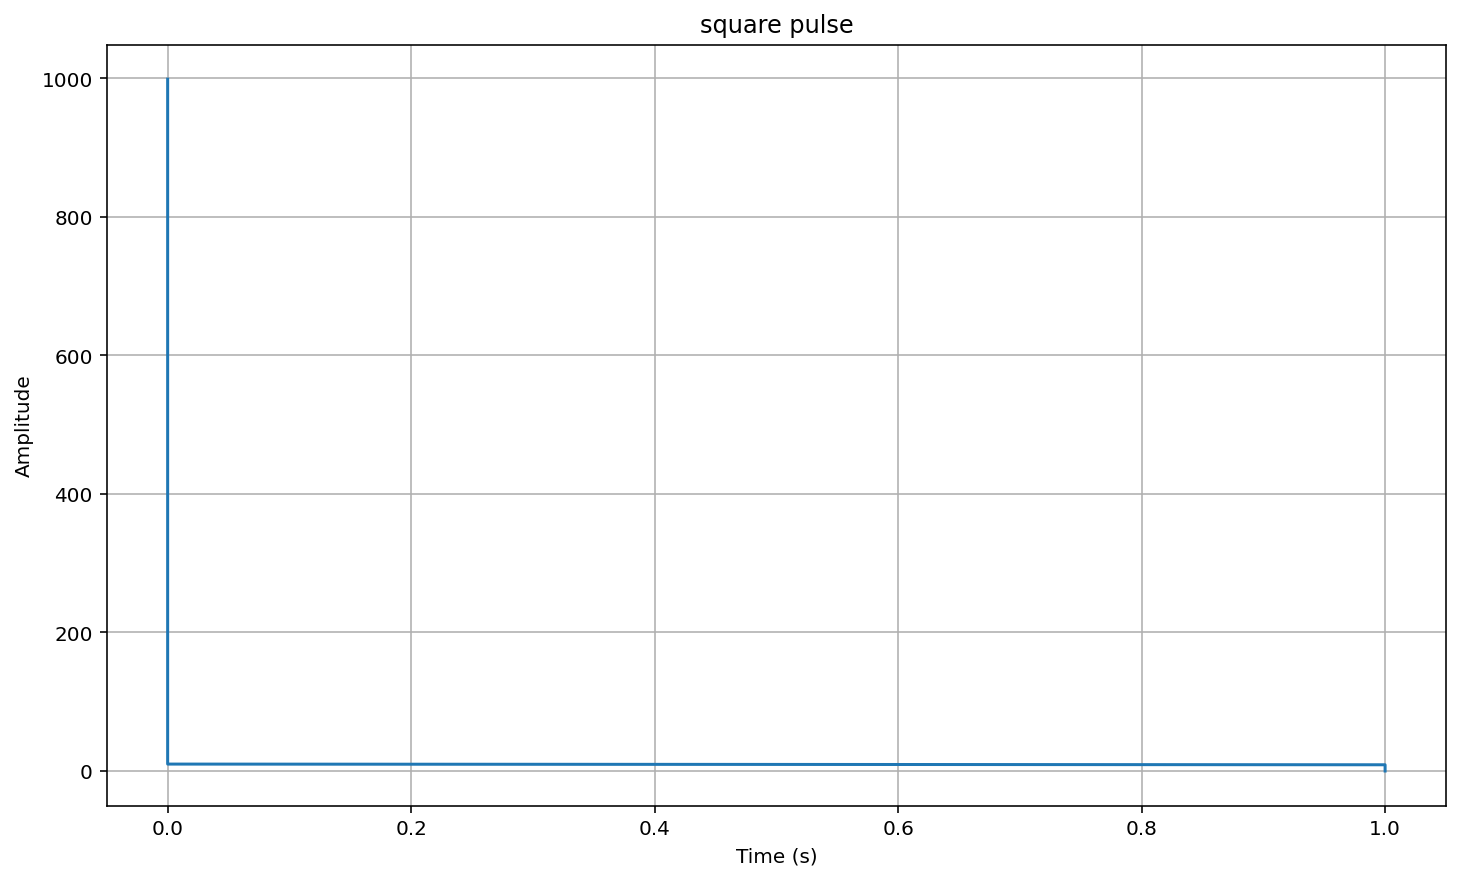

Text(0, 0.5, 'coefficients')

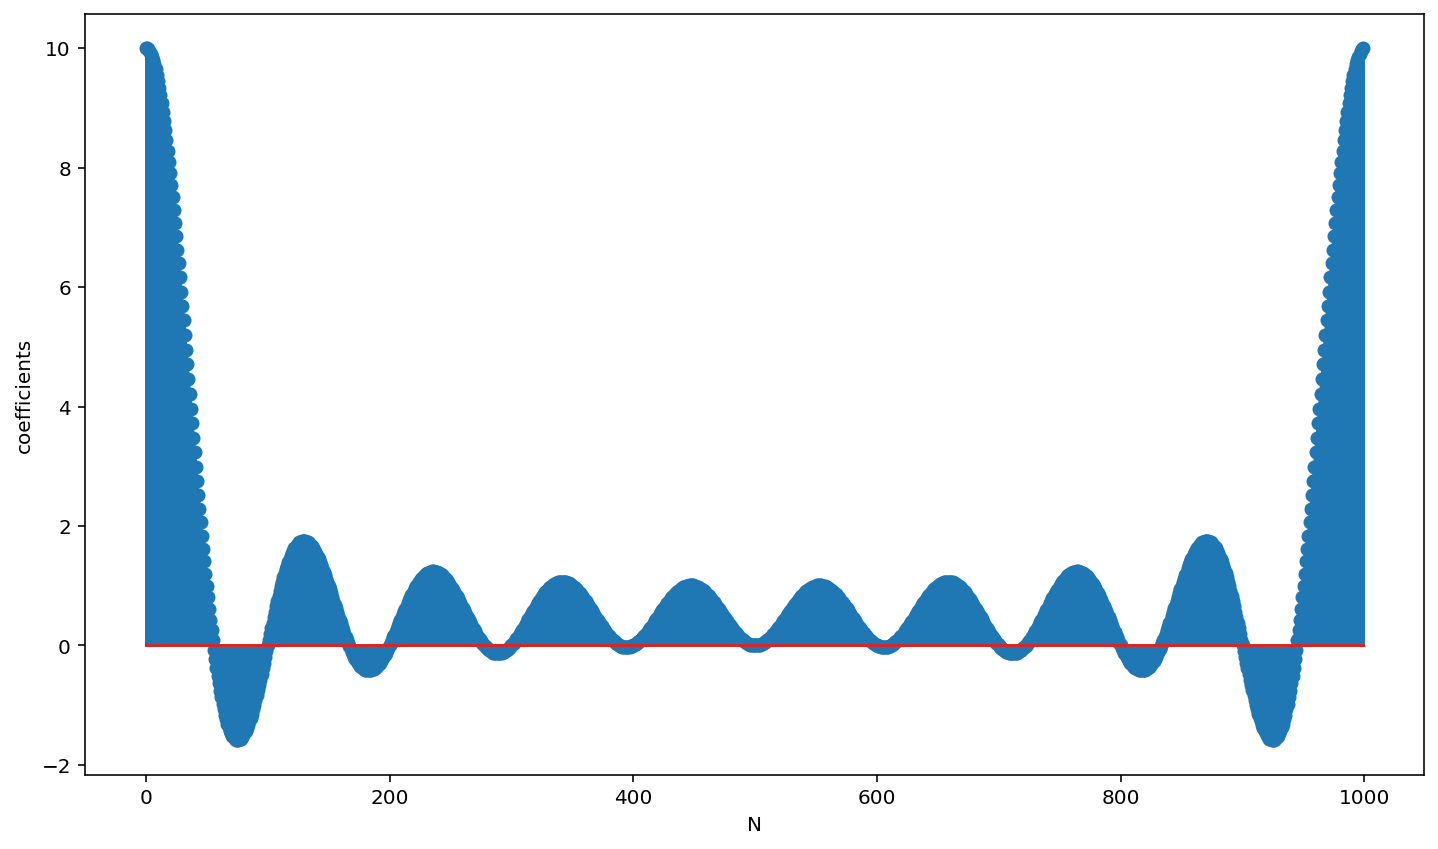

In [10]:
# YOUR CODE HERE
#creation of the square wave
N=1000
t=1
t = np.linspace(0,1000,N, endpoint=False)
f = np.zeros(N)
f[t < 10] = 1
#plotting square wave
plt.plot(f,t)
plt.title("square pulse")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

#calculation and plot of coefficients
F = dft_1d(f.real)
plt.plot(t,F)
plt.stem(F.real)
plt.xlabel('N')
plt.ylabel('coefficients')


### Task 3: Theory vs. result
<div class="alert alert-success">
Plot your transformed square pulse and the corresponding mathematical function on the same plot. Explain the result supporting your reasoning with appropriate calculation and plot.
</div>

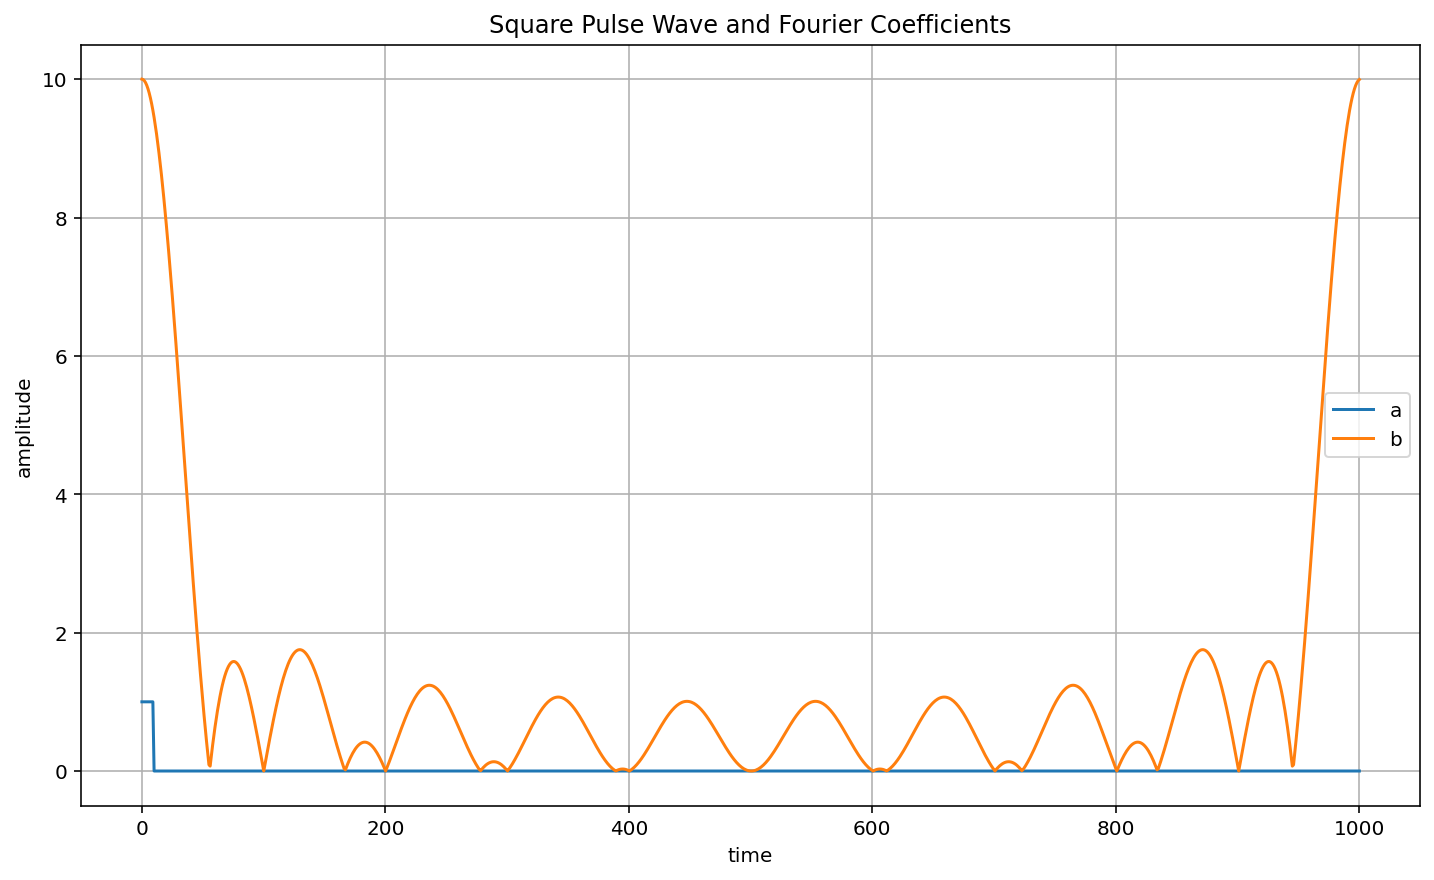

In [4]:
# YOUR CODE HERE

#generating a square pulse wave
N = 1000
l = np.linspace(0,1000,N)
z = np.zeros(N)

z[:10]=1

#implemeting fourrier tranform function FFT (obrainting frequenc7 and coeeficente) and rescaling coeeficients


coeffs = np.fft.fft(z)/N

rescalled_coeffs = coeffs*N


#graphing
plt.plot(l,z, label='a')
plt.plot(l, abs(rescalled_coeffs.real), label="b")
plt.grid()
plt.legend()
plt.title('Square Pulse Wave and Fourier Coefficients')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()

The square pulse can be roughly approximated by the Fourier series, although there are small differences between the two signals, particularly close to the margins of the pulse. The Gibbs effect, which results in overshoots near discontinuities, is to blame for this. The sharp edges of the pulse are where the overshoot is most obvious. The overshoot persists as the Fourier series' elements count grows. Since Fourier series are better suited for describing continuous, periodic functions, this is a well\-known characteristic of these series. As a result, at the discontinuities in functions where they exist, the Fourier series will always show some excess.


# Part 2: Analysing audio samples

### Task 4

<div class="alert alert-success">
    For this section, you have a selection of audio files from which you should choose two to analyse. These files consist of digital samples of musical instruments playing a single note, <b>recorded at a sampling rate of 44.1 kHz.</b>
<br>
Write a function called <code> load_data`</code> that loads and analyses a short audio sample using Fourier Transform. Your function should take in a file name as an input and:
<ul>
<li> load the data set stored in that file</li>
<li>plot the first 2000 points only of the data set</li>
<li>on a separate plot, plot a sub-sample of the data every 500th point</li>
<li> <b> return the loaded data as an array</b>  </li>
    </ul>



In [5]:
# YOUR CODE HERE
def load_data(file):
    x = np.loadtxt(file)
    #plot the first 2000 points in the data file
    plt.figure(figsize=(12,4))
    plt.plot(x[:2000])
    plt.title('First 2000 datapoints')
    plt.ylabel('AMPLITUDE')
    plt.xlabel('SAMPLE INDEX')
    plt.show()
    #plotting a sub smaple of the data every 500th point
    
    plt.figure(figsize=(12,4))
    plt.plot(x[::500])
    plt.title('Sub-sample')
    plt.xlabel('SAMPLE INDEX')
    plt.ylabel('AMPLITUDE')
    plt.show()
    return np.array(x)



In [6]:
%run -i c9checkpoint1-patch.py

************
 Well done! All test passed. You can move to the next part of the task.
************


<Figure size 864x504 with 0 Axes>

### Task 5
<div class="alert alert-success">
Write a function called <code>analyse</code> which takes in a data array and uses FFT to calculate the discrete Fourier Transform of an audio sample then plot the first 10,000 coefficients. Your function should take two arguments: the data array and a label for the plot (a string) and return all FT coefficients.
</div>

In [7]:
# YOUR CODE HERE
def analyse(data, label):
    #calculating fourier transform of the audio sample
    ft=np.fft.rfft(data)
    #plotting the first 10000 coefficients
    
    plt.plot(np.abs(ft[:100000]))
    plt.xlabel('K')
    plt.ylabel('COOEFFICIENTS')
    plt.title(label)
    plt.show()
    return ft

In [8]:
%run -i c9checkpoint2-patch.py

************
 Well done! All test passed. You can move to the next part of the task.
************


<Figure size 864x504 with 0 Axes>

### Task 6
<div class="alert alert-success">
    Using your functions above, analyse <b>two</b> audio samples saved in your directory. For each sample:
<ul>
    <li>identify the fundamental's Fourier coefficient index $k$. (Remember - the fundamental is not necessarily the largest peak!) </li>
    <li>use text cells to make at least three sensible observations of the characteristics you observe in your plots.</li>
    <li>determine what note did the instrument play? Give your answer in Hz - musicians are encouraged to also give the name of the note!</li>
    </ul><br>
    <i>Hint: The frequency $f$ is related to the Fourier coefficient index $k$ by $ f = \frac{\nu k}{N}, $where $\nu$ is the sampling rate and $N$ the total number of sampled data points.</i>
</div>

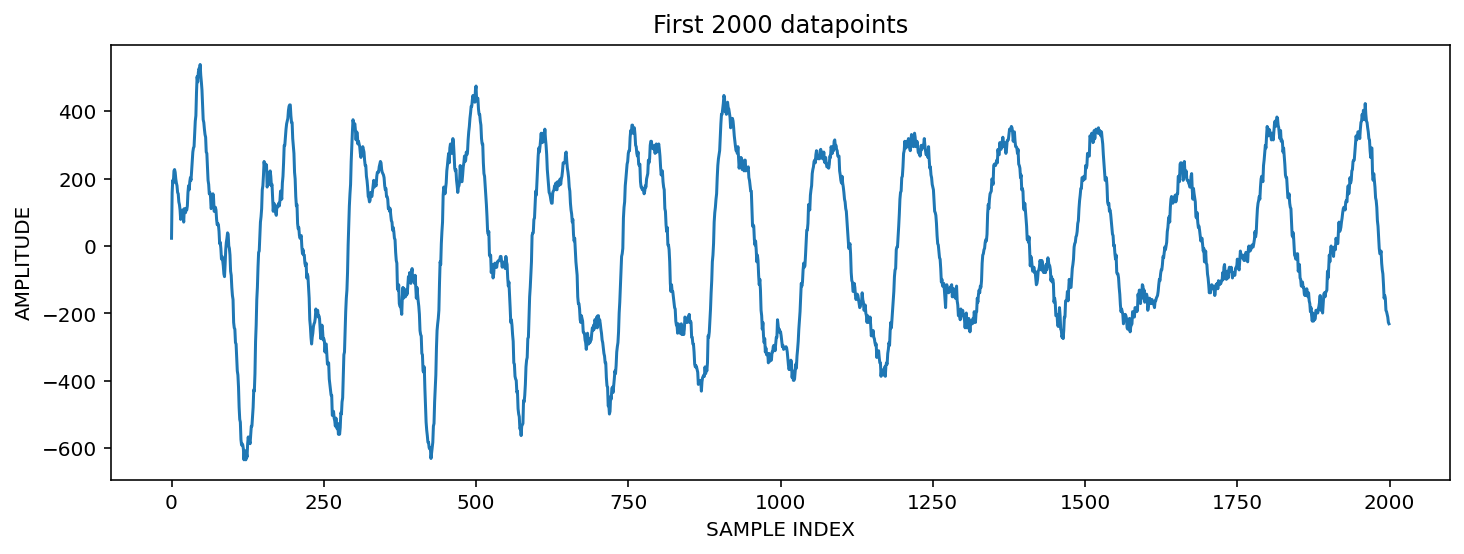

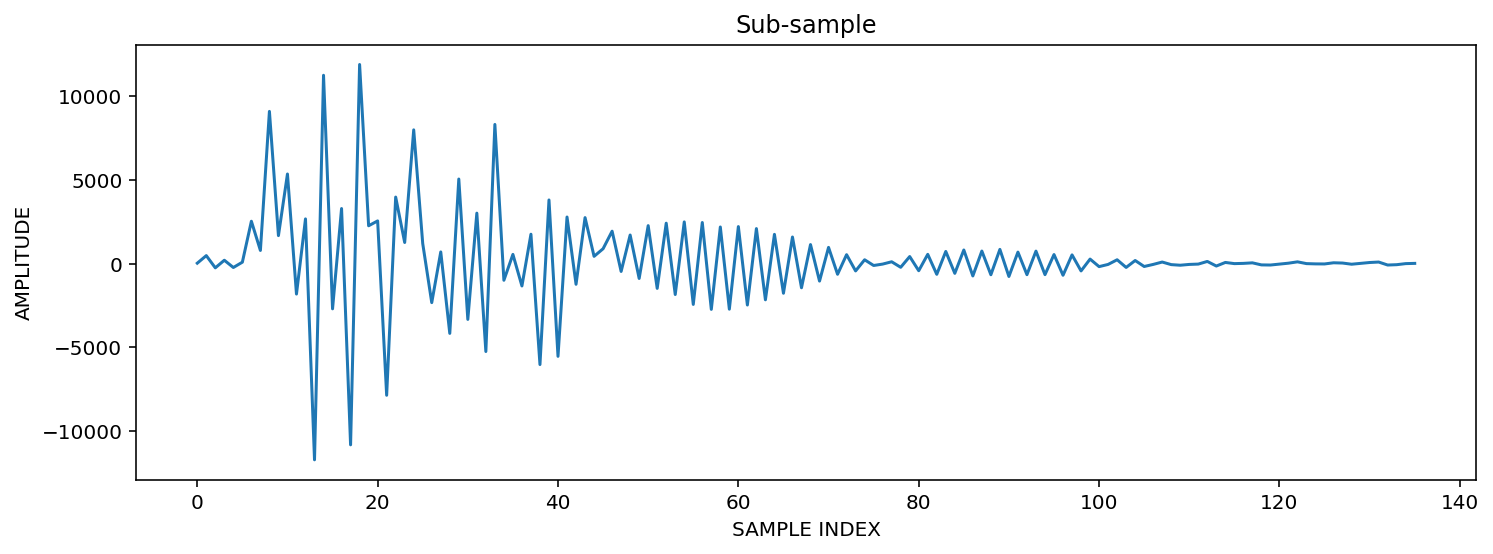

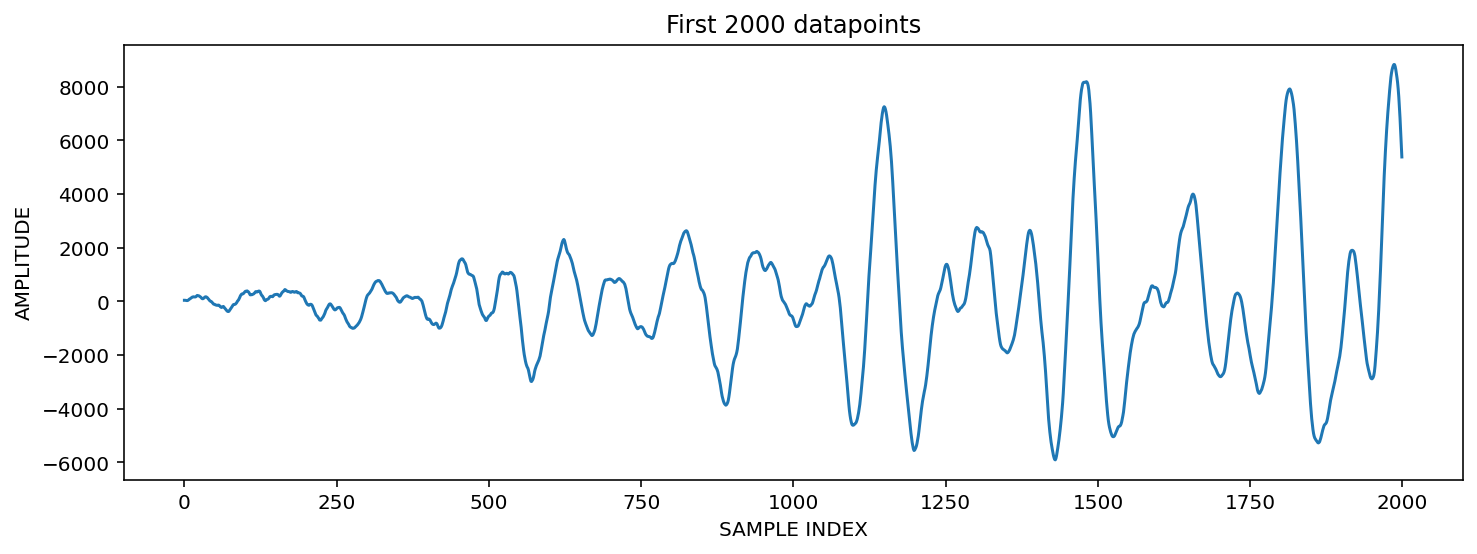

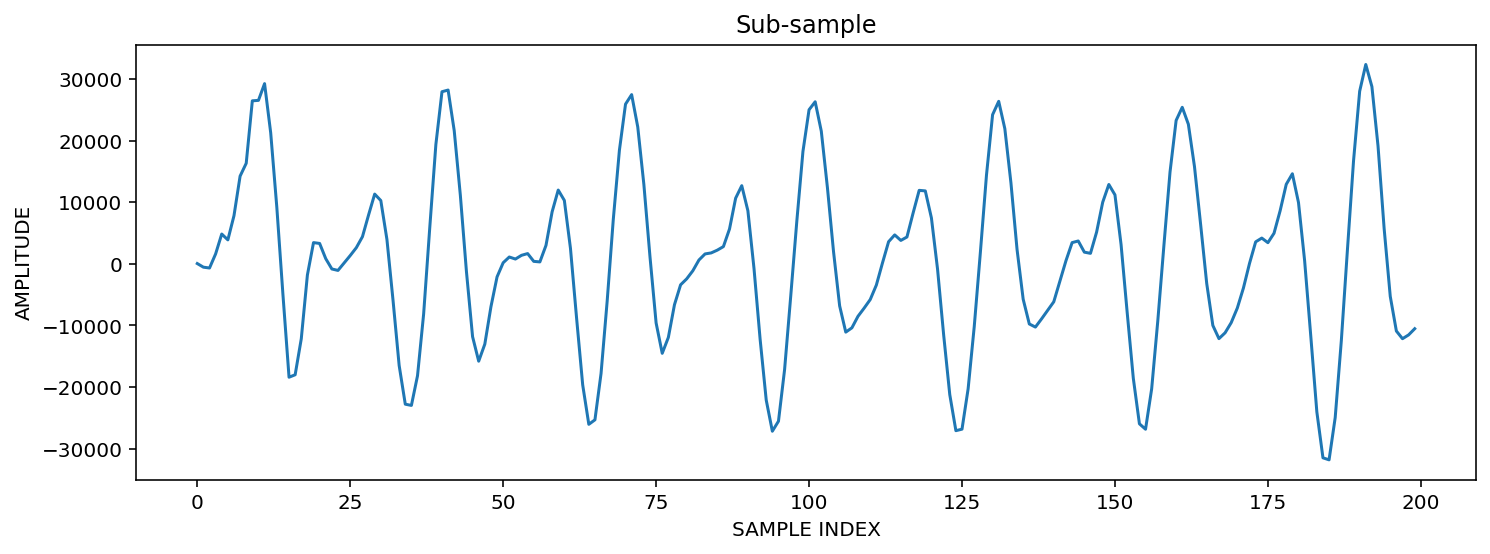

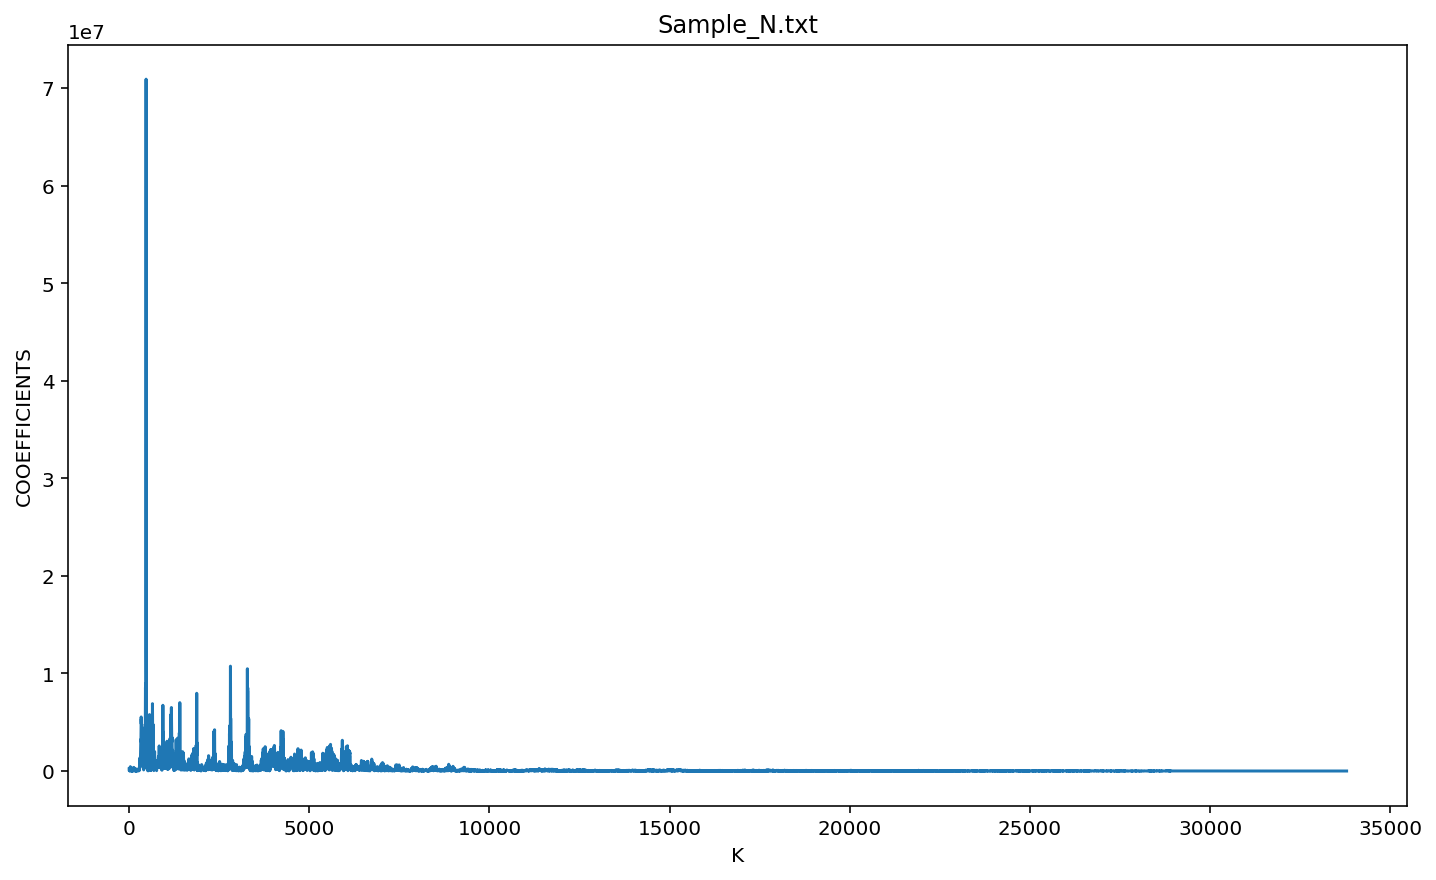

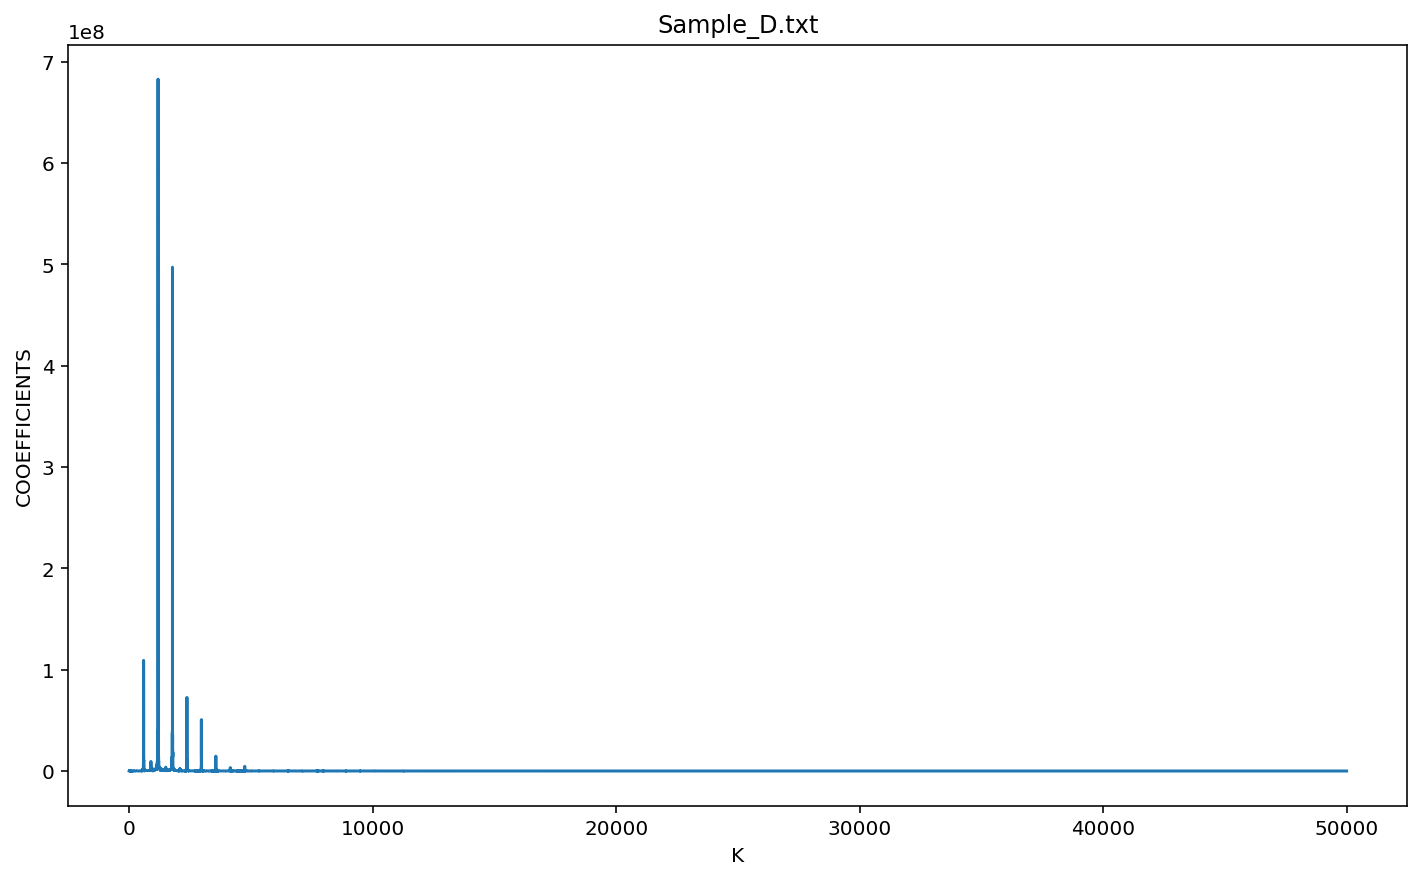

Fundament frequency of sample 1 : 306.73Hz
Fundament frequency of sample 1 : 207.27Hz


In [9]:
# YOUR CODE HERE

#loading dagta
s1 = load_data('Sample_N.txt')
s2 = load_data('Sample_D.txt')
sampling_note = 44100 #Hz
s1_analysed = analyse(s1, 'Sample_N.txt')
s2_analysed = analyse(s2, 'Sample_D.txt')

xi = np.argmax(np.abs(s1_analysed))
xii = xi*sampling_note/len(s1)


yi = np.argmax(np.abs(s2_analysed))
yii = xi*sampling_note/len(s2)

print(f"Fundament frequency of sample 1 : {xii:.2f}Hz")
print(f"Fundament frequency of sample 1 : {yii:.2f}Hz")

<div class="alert alert-success">
For no extra marks, but to earn the admiration of the demonstrators - can you guess what instrument is playing each of your three samples just from looking at the data?<br><br>
</div>

General quality of plots

General quality of code comments and docstrings

General quality of text cells